In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Load the data from CSV
file_path = 'D:/data_analysis/NLP/twitter_sentiment_analysis/mamikos.csv'
twitter_data = pd.read_csv(file_path)

# Display the first few lines
print(twitter_data.head())

                                                 URL  \
0  https://twitter.com/ayangvei/status/1668658521...   
1  https://twitter.com/ballsinyourarea/status/166...   
2  https://twitter.com/ConcacafID/status/16686367...   
3  https://twitter.com/haanzhing888/status/166863...   
4  https://twitter.com/Yourlovelygf_/status/16685...   

                        Date  \
0  2023-06-13 16:36:08+00:00   
1  2023-06-13 16:22:00+00:00   
2  2023-06-13 15:09:42+00:00   
3  2023-06-13 15:06:18+00:00   
4  2023-06-13 11:56:19+00:00   

                                               Tweet                   ID  \
0     @ifrhit Mamikos harganya terlalu overpriced gt  1668658521888665600   
1  udah nyiapin tas gede sihh sama planning baju ...  1668654965483782144   
2  @idextratime Orangnya lagi repot ngurusin buat...  1668636771146690561   
3  @dioxazinee_ uda coba cari-cari lewat aplikasi...  1668635916016193537   
4  @jogmfs Klo pgn gampang bisa cari pake apk mam...  1668588103429410818   

   Repl

In [3]:
tweet_text = twitter_data['Tweet']
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in tweet_text:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['@ifrhit', 'Mamikos', 'harganya', 'terlalu', 'overpriced', 'gt', 'udah', 'nyiapin', 'tas', 'gede', 'sihh', 'sama', 'planning', 'baju', 'apa', 'aja', 'yg', 'mau', 'dibawa', '+', 'nyari', 'kosan', 'di', 'mamikos', '(BISMILLAH', 'KETERIMA', 'PIL', '1)', '@idextratime', 'Orangnya', 'lagi', 'repot', 'ngurusin', 'buat', 'pindah', 'kosan,', 'ETI.', 'Scroll', 'scroll', 'mamikos', 'gak', 'nemu', 'yang', 'sesuai', 'terus.', 'Giliran', 'ada', 'yang', 'sesuai', 'udah', 'full', 'booked.', '@dioxazinee_', 'uda', 'coba', 'cari-cari', 'lewat', 'aplikasi', 'mamikos?', '@jogmfs', 'Klo', 'pgn', 'gampang', 'bisa', 'cari', 'pake', 'apk', 'mamikos', '@astudyaddict', 'Banyakk', 'di', 'fb,', 'mamikos,', 'google', 'maps,', 'instagram', 'wkwkwk', 'Yakkkk', 'sekian', 'dulu', 'thread', 'hari', 'ini,', 'besok', 'apalagi', 'komen', 'dongss', 'biar', 'mimin', 'kasi', 'rekomendasi', 'lagi', '🤗🤗', '#kos', '#infokos', '#rekomendasikos', '#mamikos', '#Apik', '#Singgahsini', '#tangerang', '#bekasi', '#jakarta', '#Semara

In [4]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)
# len(lines2)

In [5]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Create an instance of the Indonesian stemmer from Sastrawi library
stemmer = StemmerFactory().create_stemmer()

stem = []
for word in lines2:
    stem.append(stemmer.stem(word))
    
stem

['ifrhit',
 'mamikos',
 'harga',
 'terlalu',
 'overpriced',
 'gt',
 'udah',
 'nyiapin',
 'tas',
 'gede',
 'sihh',
 'sama',
 'planning',
 'baju',
 'apa',
 'aja',
 'yg',
 'mau',
 'bawa',
 'nyari',
 'kosan',
 'di',
 'mamikos',
 'bismillah',
 'terima',
 'pil',
 '1',
 'idextratime',
 'orang',
 'lagi',
 'repot',
 'ngurusin',
 'buat',
 'pindah',
 'kosan',
 'eti',
 'scroll',
 'scroll',
 'mamikos',
 'gak',
 'nemu',
 'yang',
 'sesuai',
 'terus',
 'gilir',
 'ada',
 'yang',
 'sesuai',
 'udah',
 'full',
 'booked',
 'dioxazinee',
 'uda',
 'coba',
 'caricari',
 'lewat',
 'aplikasi',
 'mamikos',
 'jogmfs',
 'klo',
 'pgn',
 'gampang',
 'bisa',
 'cari',
 'pake',
 'apk',
 'mamikos',
 'astudyaddict',
 'banyakk',
 'di',
 'fb',
 'mamikos',
 'google',
 'maps',
 'instagram',
 'wkwkwk',
 'yakkkk',
 'sekian',
 'dulu',
 'thread',
 'hari',
 'ini',
 'besok',
 'apalagi',
 'komen',
 'dongss',
 'biar',
 'mimin',
 'kasi',
 'rekomendasi',
 'lagi',
 'kos',
 'infokos',
 'rekomendasikos',
 'mamikos',
 'apik',
 'singgahsin

In [6]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['ifrhit',
 'mamikos',
 'harga',
 'terlalu',
 'overpriced',
 'gt',
 'udah',
 'nyiapin',
 'tas',
 'gede',
 'sihh',
 'sama',
 'planning',
 'baju',
 'apa',
 'aja',
 'yg',
 'mau',
 'bawa',
 'nyari',
 'kosan',
 'di',
 'mamikos',
 'bismillah',
 'terima',
 'pil',
 '1',
 'idextratime',
 'orang',
 'lagi',
 'repot',
 'ngurusin',
 'buat',
 'pindah',
 'kosan',
 'eti',
 'scroll',
 'scroll',
 'mamikos',
 'gak',
 'nemu',
 'yang',
 'sesuai',
 'terus',
 'gilir',
 'ada',
 'yang',
 'sesuai',
 'udah',
 'booked',
 'dioxazinee',
 'uda',
 'coba',
 'caricari',
 'lewat',
 'aplikasi',
 'mamikos',
 'jogmfs',
 'klo',
 'pgn',
 'gampang',
 'bisa',
 'cari',
 'pake',
 'apk',
 'mamikos',
 'astudyaddict',
 'banyakk',
 'di',
 'fb',
 'mamikos',
 'google',
 'maps',
 'instagram',
 'wkwkwk',
 'yakkkk',
 'sekian',
 'dulu',
 'thread',
 'hari',
 'ini',
 'besok',
 'apalagi',
 'komen',
 'dongss',
 'biar',
 'mimin',
 'kasi',
 'rekomendasi',
 'lagi',
 'kos',
 'infokos',
 'rekomendasikos',
 'mamikos',
 'apik',
 'singgahsini',
 'tan

In [7]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

#df
#df['freq'] = df.groupby(0)[0].transform('count')
#df['freq'] = df.groupby(0)[0].transform('count')
#df.sort_values(by = ('freq'), ascending=False)

In [8]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 5929, 2: 1038, 3: 415, 4: 280, 5: 163, 6: 126, 8: 84, 7: 81, 9: 78, 10: 60, ...})

In [9]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


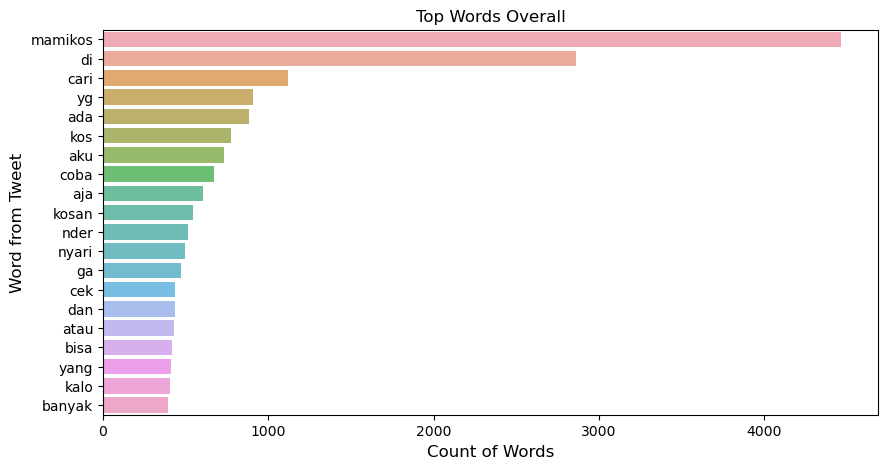

In [10]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [13]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [14]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [15]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


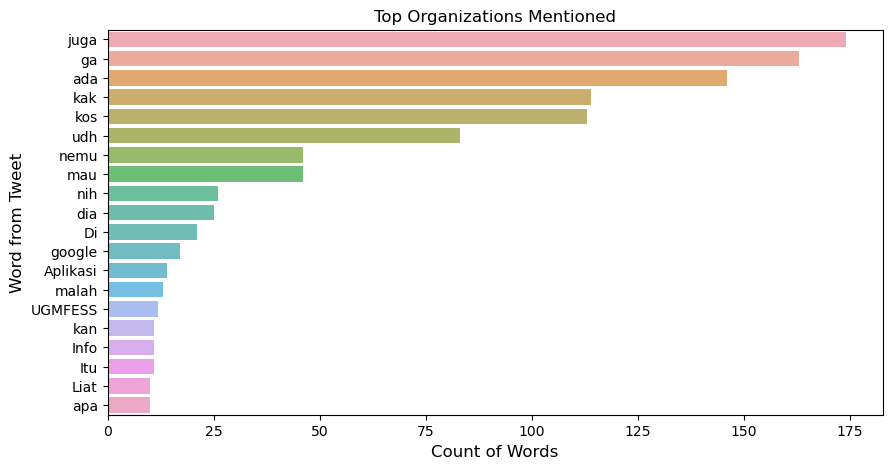

In [19]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [17]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


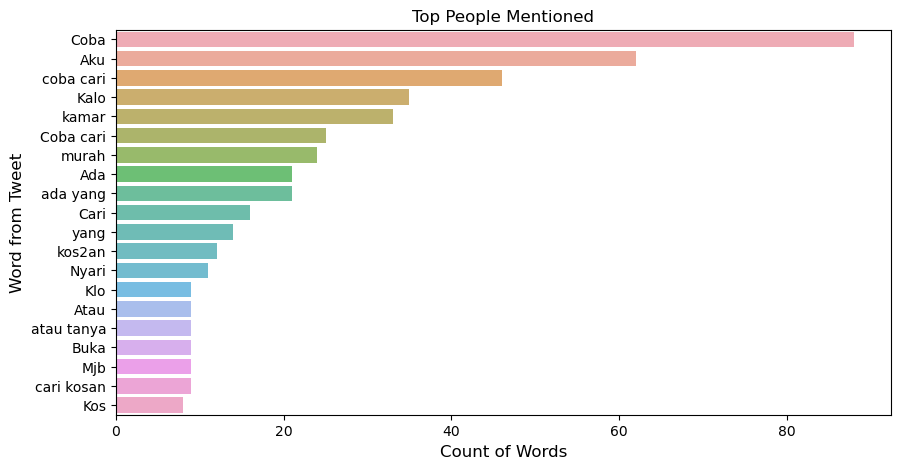

In [18]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()